In [11]:
!pip install scikit-learn

## Import libraries
1. **pandas** is imported for efficient data manipulation and handling through DataFrames.
2. **numpy** is utilized for fundamental numerical operations and array manipulation.
3. **matplotlib.pyplot** is brought in for creating various types of plots and charts for data visualization.
4. **seaborn** is employed to enhance the aesthetics of plots, particularly when working with Pandas DataFrames.
5. **sklearn.cluster.KMeans** is used for implementing the K-means clustering algorithm, an unsupervised learning technique.
6. **sklearn.preprocessing.StandardScaler** is applied for feature scaling to standardize numerical features.
7. **sklearn.preprocessing.LabelEncoder** is used for encoding categorical variables, facilitating their use in machine learning models.
8. **sklearn.impute.SimpleImputer** is employed to fill missing values in the dataset.
9. **sklearn.pipeline.make_pipeline** is utilized to construct a streamlined machine learning pipeline, simplifying the process of combining preprocessing and modeling steps.
10. **sklearn.decomposition.PCA** is imported for Principal Component Analysis, enabling dimensionality reduction and feature extraction.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

crime_data = pd.read_csv('/Users/anushka/Downloads/projects/crime.csv')

## Data Processing
1. **Convert Categorical Variables to Categories:**<br>
1.1 **Task:** Convert the 'CrimeType' and 'Severity' columns in the crime_data DataFrame to the 'category' data type.<br>
1.2 **Purpose:** This step ensures that the categorical variables are appropriately encoded for subsequent analysis.<br>
2. **Impute Missing Values:**<br>
2.1 **Task:** Use the SimpleImputer from scikit-learn to fill missing values in the 'Latitude' and 'Longitude' columns with their mean values.<br>
2.2 **Purpose:** Imputing missing values ensures completeness in the dataset and provides a more reliable input for subsequent analyses.<br>
3. **Label Encoding for Categorical Variables:**<br>
3.1 **Task:** Use LabelEncoder from scikit-learn to transform the categorical 'CrimeType' and 'Severity' columns into numerical representations.<br>
3.2 **Purpose:** Label encoding converts categorical data into a format suitable for machine learning algorithms, ensuring numerical compatibility.<br>
4. **Standardization of Numerical Features:**<br>
4.1 **Task:** Standardize the numerical features ('Latitude', 'Longitude', 'CrimeType', 'Severity') using StandardScaler from scikit-learn.<br>
4.2 **Purpose:** Standardization scales numerical features to have zero mean and unit variance, preventing features with larger scales from dominating the clustering process. The resulting X_scaled is the input data prepared for K-means clustering.

In [3]:
crime_data['CrimeType'] = crime_data['CrimeType'].astype('category')
crime_data['Severity'] = crime_data['Severity'].astype('category')
imputer = SimpleImputer(strategy='mean')
crime_data_imputed = pd.DataFrame(imputer.fit_transform(crime_data[['Latitude', 'Longitude']]), columns=['Latitude', 'Longitude'])
label_encoder = LabelEncoder()
crime_data_imputed['CrimeType'] = label_encoder.fit_transform(crime_data['CrimeType'])
crime_data_imputed['Severity'] = label_encoder.fit_transform(crime_data['Severity'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(crime_data_imputed)

## Elbow Plot
The Elbow method is applied to determine the optimal number of clusters (k) for K-means clustering. <br> The loop iterates through a range of potential cluster counts (from 1 to 10), and for each k, a K-means model is fitted using the standardized data (X_scaled). The within-cluster sum of squares (WCSS), representing the sum of squared distances between data points and their assigned cluster centroids, is calculated and stored. <br>The resulting WCSS values are then plotted against the number of clusters, and the plot is examined to identify an "elbow" point, where the rate of decrease in WCSS slows down. This point indicates the optimal number of clusters, striking a balance between model complexity and the reduction in WCSS, aiding in the subsequent K-means clustering analysis.

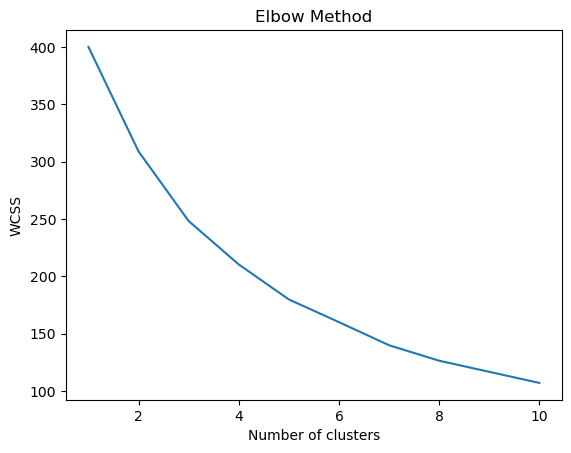

In [4]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## K-Means Clustering
K-means clustering is applied to the standardized data (X_scaled) with the optimal number of clusters determined as 8. <br> The K-means algorithm is instantiated with the specified parameters, including the initialization method ('k-means++'), maximum iterations (300), and the number of initializations (10). <br> The model is fitted to the data, and cluster labels are assigned to each data point. These labels are added as a new column, 'Cluster', in the original crime_data DataFrame. Additionally, Principal Component Analysis (PCA) is employed to reduce the dimensionality of the data to two principal components. <br> A scatter plot is then generated, where each point represents a data point in the 2D space defined by the first two principal components. The points are colored according to their assigned cluster labels, providing a visual representation of the K-means clustering results and the spatial distribution of the clusters in the reduced-dimensional space.

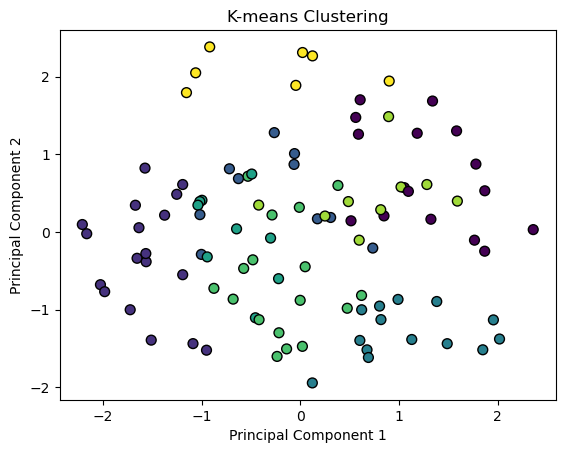

In [5]:
from sklearn.cluster import KMeans
optimal_clusters = 8 

kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X_scaled)
crime_data['Cluster'] = kmeans.labels_

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', edgecolor='k', s=50)
plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## Displaying number of clusters for the PCA

In [6]:
print("First few rows of the dataset with cluster labels:")
print(crime_data.head())
print("\n")

First few rows of the dataset with cluster labels:
    Latitude   Longitude CrimeType Severity  Cluster
0  38.265130 -121.495003   Assault      Low        1
1  37.817740 -121.640678  Burglary   Medium        5
2  38.453849 -121.315177  Burglary      Low        2
3  38.228413 -121.551363  Burglary     High        2
4  37.578280 -121.754705  Burglary      Low        0




## Distribution according to Severity
The plot provides an insightful overview of the distribution of crime types within clusters, categorized by severity levels, aiding in the analysis of crime patterns across different levels of severity in the dataset.

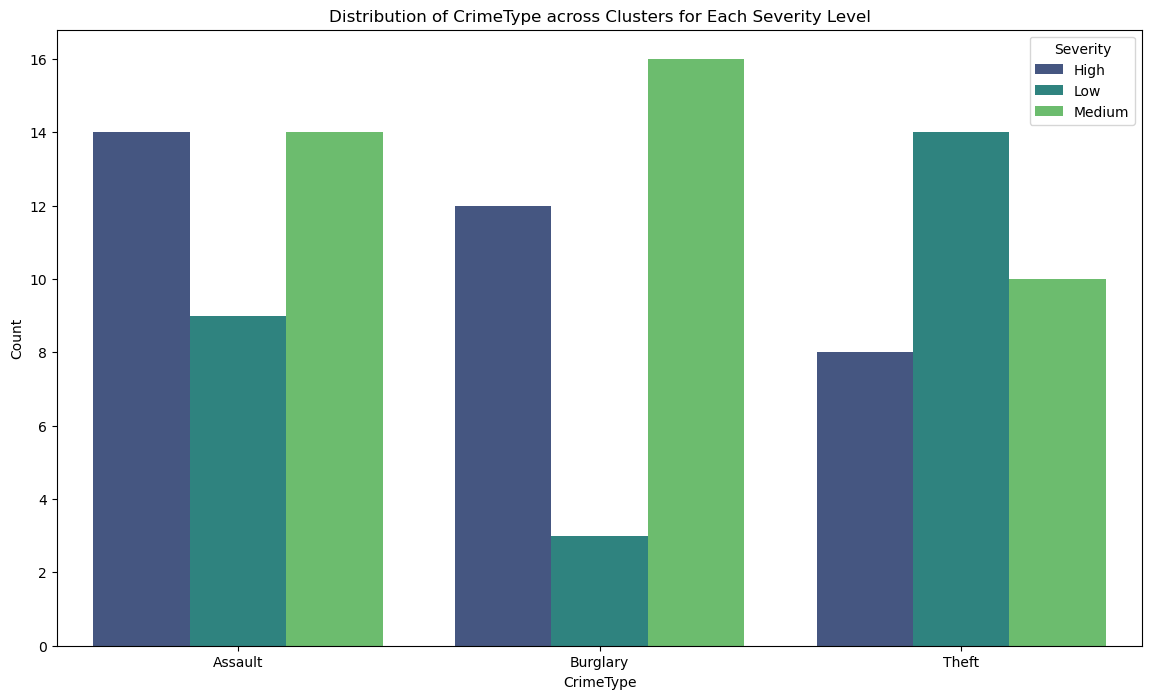

In [7]:
plt.figure(figsize=(14, 8))
sns.countplot(x='CrimeType', hue='Severity', data=crime_data, hue_order=crime_data['Severity'].cat.categories, palette='viridis')
plt.title('Distribution of CrimeType across Clusters for Each Severity Level')
plt.xlabel('CrimeType')
plt.ylabel('Count')
plt.legend(title='Severity')
plt.show()

## Conclusion
The K-means clustering analysis on the crime dataset yielded valuable insights into the spatial distribution of crime patterns and the grouping of similar criminal activities. This comprehensive analysis contributes to a better understanding of crime patterns, facilitates targeted law enforcement strategies, and can inform resource allocation for crime prevention efforts.